# Question 5

### Import dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_619/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

### Import data

In [3]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds_2016 = ds.sel(time=slice('2002-01-01', '2016-07-01'))
ds_2012 = ds.sel(time=slice('2002-01-01', '2012-12-31'))

### Group by day

In [4]:
# calculate the daily cycle using groupby
# daily_2016 = ds_2016.groupby(ds_2016["time.dayofyear"]).mean()
# daily_2012 = ds_2012.groupby(ds_2012["time.dayofyear"]).mean()
# daily_2012

### 

### Calculate Anomaly

In [5]:
anomaly = ds_2016.groupby("time.dayofyear").max()['analysed_sst'] - ds_2012.groupby(ds_2012["time.dayofyear"]).mean()['analysed_sst']

In [7]:
anomaly

<xarray.DataArray 'analysed_sst' (dayofyear: 366, lat: 251, lon: 234)>
array([[[1.0394287 , 1.1380005 , 1.0646667 , ..., 1.7756348 ,
         1.9239807 , 1.9207153 ],
        [0.9997864 , 0.9602051 , 0.950531  , ..., 1.9747009 ,
         1.9664917 , 1.8919678 ],
        [0.89993286, 0.842926  , 0.79870605, ..., 2.019989  ,
         1.9577026 , 1.8890076 ],
        ...,
        [1.7537842 , 1.7610168 , 1.7362976 , ...,        nan,
                nan,        nan],
        [1.8562927 , 1.860199  , 1.8563232 , ...,        nan,
                nan,        nan],
        [2.0510254 , 1.9013977 , 1.919281  , ...,        nan,
                nan,        nan]],

       [[1.1643982 , 1.1880188 , 1.2184143 , ..., 1.4958801 ,
         1.4981079 , 1.5135193 ],
        [1.1336975 , 1.10849   , 1.1324158 , ..., 1.5457764 ,
         1.5767212 , 1.5036011 ],
        [1.0787048 , 1.0392151 , 1.0324097 , ..., 1.6292114 ,
         1.6693115 , 1.6562805 ],
...
        [1.8031311 , 1.7487183 , 1.774353  , ...,        nan,
                nan,        nan],
        [1.7254944 , 1.6968384 , 1.7832947 , ...,        nan,
                nan,        nan],
        [1.8887329 , 1.777008  , 1.7617188 , ...,        nan,
                nan,        nan]],

       [[0.35702515, 0.38500977, 0.4506836 , ..., 0.14865112,
         0.10998535, 0.2163086 ],
        [0.4366455 , 0.43167114, 0.5010071 , ..., 0.16766357,
         0.21536255, 0.31365967],
        [0.2662964 , 0.40899658, 0.4920044 , ..., 0.2246399 ,
         0.29464722, 0.21432495],
        ...,
        [1.6593323 , 1.6366577 , 1.5776367 , ...,        nan,
                nan,        nan],
        [1.6816711 , 1.6753235 , 1.652008  , ...,        nan,
                nan,        nan],
        [1.6983337 , 1.6916809 , 1.7410278 , ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * lat        (lat) float32 33.0 33.06 33.12 33.18 ... 47.82 47.88 47.94 48.0
  * lon        (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.1 -118.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

### Plot Sea Surface Temperature

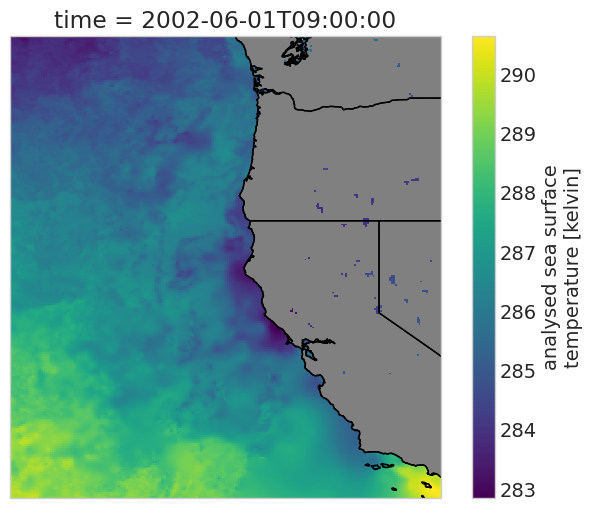

In [9]:
anomaly[0, :, :].plot();

# Plot on a map
ax = plt.subplot(projection=crs)
ds.analysed_sst[0, :, :].plot(ax=ax, transform=crs)
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))